# Milestone 2

### 1. Introduction

Name : Sonny Riadi\
Batch : FTDS-009

`About this Project :`

in this project we want to classify the airplane passenger satisfaction using classification model.


`Objective : `

1. Find the best model to predict the passenger satisfaction
2. Find the best hyperparameters for the model
3. deploy the best model

### 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# split data into train and test
from sklearn.model_selection import train_test_split

# pipeline
from sklearn.pipeline import Pipeline

#cros val score
from sklearn.model_selection import cross_val_score

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# preprocessing handling outlier
from feature_engine.outliers import Winsorizer,OutlierTrimmer

# simple imputer
from sklearn.impute import SimpleImputer

# feature scaling and encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# sklearn ColumnTransformer
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# save model
import pickle

# metrics
from sklearn.metrics import classification_report, accuracy_score

#disable warning
import warnings 
warnings.filterwarnings("ignore") 

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

   ### 3. Data Loading

in this project we use `Airline Passenger Satisfaction` data set, this data can be found at [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

In [2]:
data = pd.read_csv('data.csv', sep=',')
pd.set_option('display.max_columns',None)

In [3]:
data.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [4]:
data.shape

(129880, 24)

About this dataset : The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
	

in this dataset :

| Attributes                        | description                                                                 |
|-----------------------------------|-----------------------------------------------------------------------------|
| Gender                            |  Gender of the passengers (Female, Male)                                    |
| Customer Type                     |  The customer type (Loyal customer, disloyal customer)                      |
| Age                               |  The actual age of the passengers                                           |
| Type of Travel                    |  Purpose of the flight of the passengers (Personal Travel, Business Travel) |
| Class                             |  Travel class in the plane of the passengers (Business, Eco, Eco Plus)      |
| Flight distance                   |  The flight distance of this journey                                        |
| Inflight wifi service             |  Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)     |
| Departure/Arrival time convenient |  Satisfaction level of Departure/Arrival time convenient                    |
| Ease of Online booking            |  Satisfaction level of online booking                                       |
| Gate location                     |  Satisfaction level of Gate location                                        |
| Food and drink                    |  Satisfaction level of Food and drink                                       |
| Online boarding                   |  Satisfaction level of online boarding                                      |
| Seat comfort                      |  Satisfaction level of Seat comfort                                         |
| Inflight entertainment            |  Satisfaction level of inflight entertainment                               |
| On-board service                  |  Satisfaction level of On-board service                                     |
| Leg room service                  |  Satisfaction level of Leg room service                                     |
| Baggage handling                  |  Satisfaction level of baggage handling                                     |
| Check-in service                  |  Satisfaction level of Check-in service                                     |
| Inflight service                  |  Satisfaction level of inflight service                                     |
| Cleanliness                       |  Satisfaction level of Cleanliness                                          |
| Departure Delay in Minutes        |  Minutes delayed when departure                                             |
| Arrival Delay in Minutes          |  Minutes delayed when Arrival                                               |
| Satisfaction                      |  Airline satisfaction level(Satisfaction, neutral or dissatisfaction)       |

### 4. Exploratory Data Analysis (EDA)

##### 4.1 Data Visualization

##### Visualization target variable

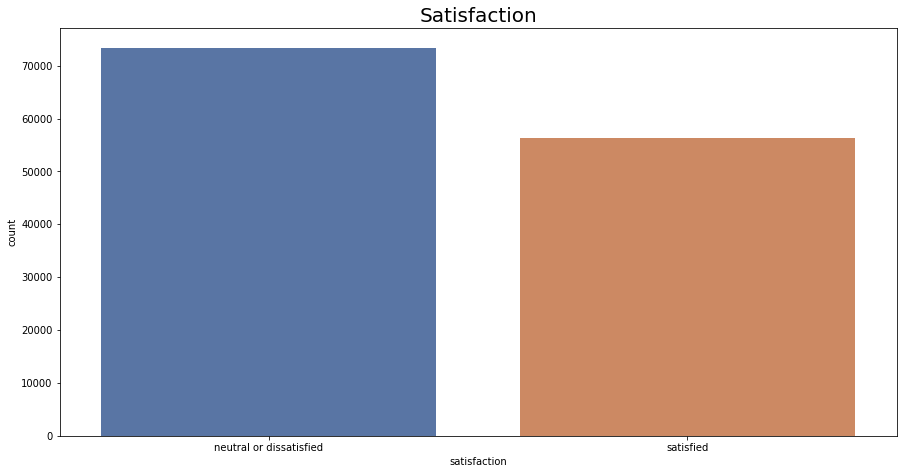

In [5]:
plt.figure(figsize=(15,7.5))
sns.countplot(x='satisfaction', data=data, palette='deep')
plt.title('Satisfaction', fontsize=20)
plt.show()

In [6]:
data.satisfaction.value_counts(normalize=True)

neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: satisfaction, dtype: float64

insight :
* based on graph above we can see the target variable proportion is 56% for `neutral or dissatisfaction` and 44% for `satisfaction`, I conclude the target variable is already balanced.
* we can see the majority of customer is `neutral or dissatisfied`

##### Visualization based on Gender

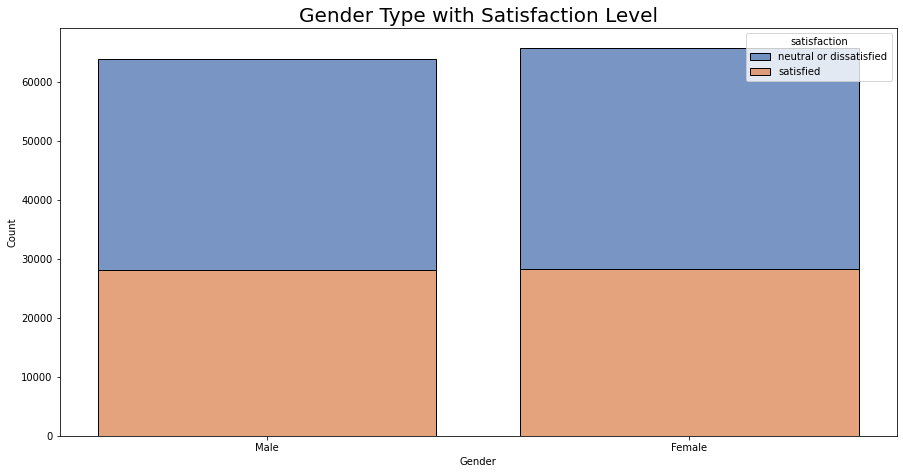

In [7]:
# histplot type 1 for column 'Customer Type'
plt.figure(figsize=(15,7.5))
sns.histplot(data=data, x='Gender', hue='satisfaction', palette='deep',multiple='stack', shrink=0.8,)
plt.title('Gender Type with Satisfaction Level', fontsize=20)
plt.show()

In [8]:
graph = data[['Gender', 'satisfaction']].reset_index(drop=False).groupby(['Gender','satisfaction']).agg(['count']).reset_index(drop=False)
graph

,Gender,satisfaction,index
,,,count
0,Female,neutral or dissatisfied,37630
1,Female,satisfied,28269
2,Male,neutral or dissatisfied,35822
3,Male,satisfied,28159


insight :
* based on gender we can see there's no different between male and female in term of satisfaction

##### Visualization of based on Customer Type

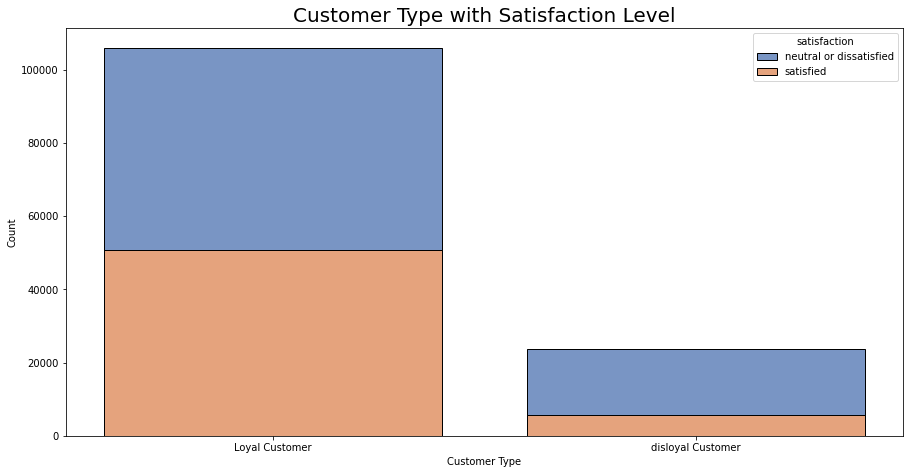

In [9]:
# histplot type 1 for column 'Customer Type'
plt.figure(figsize=(15,7.5))
sns.histplot(data=data, x='Customer Type', hue='satisfaction', palette='deep',multiple='stack', shrink=0.8,)
plt.title('Customer Type with Satisfaction Level', fontsize=20)
plt.show()

insight :
* based on graph above we can see the majority of customer type is `loyal customer`
* for loyal customer its seem the satisfaction is balanced
* for disloyal customer we can see most of the customer is `neutral or dissatisfied`

##### visualization based on Type of Travel

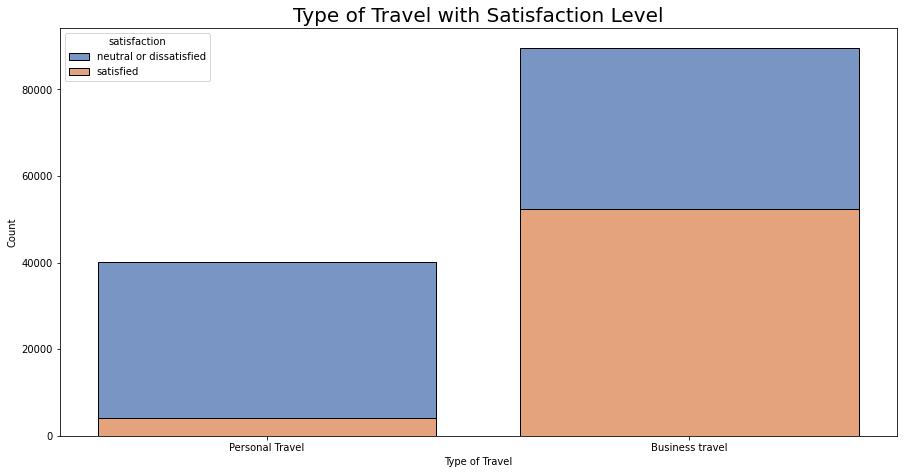

In [10]:
# histplot type 1 for column 'Type of Travel'
plt.figure(figsize=(15,7.5))
sns.histplot(data=data, x='Type of Travel', hue='satisfaction', palette='deep',multiple='stack', shrink=0.8,)
plt.title('Type of Travel with Satisfaction Level', fontsize=20)
plt.show()

insight :
* based on graph above we can see most of customer is `business travel`
* we can see the different  between `personal travel` and `business travel` in term of satisfaction, most of the customer type with `personal travel` is `neutral or dissatisfied`.

##### Visualization based on Class

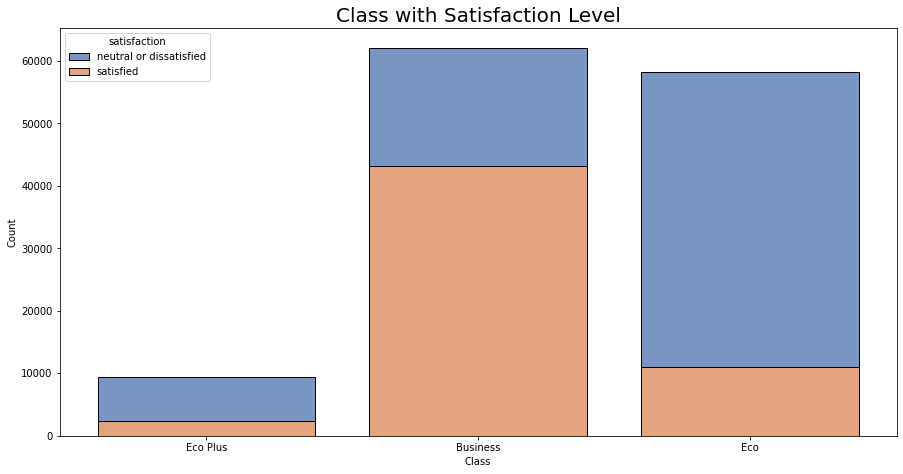

In [11]:
# histplot type 1 for column 'Class'
plt.figure(figsize=(15,7.5))
sns.histplot(data=data, x='Class', hue='satisfaction', palette='deep',multiple='stack', shrink=0.8,)
plt.title('Class with Satisfaction Level', fontsize=20)
plt.show()

insight :
* we can see there's different between `business` and `eco` in term of satisfaction, its may because different class have different kind of service.

##### 4.2 Data Distribution for numerical column

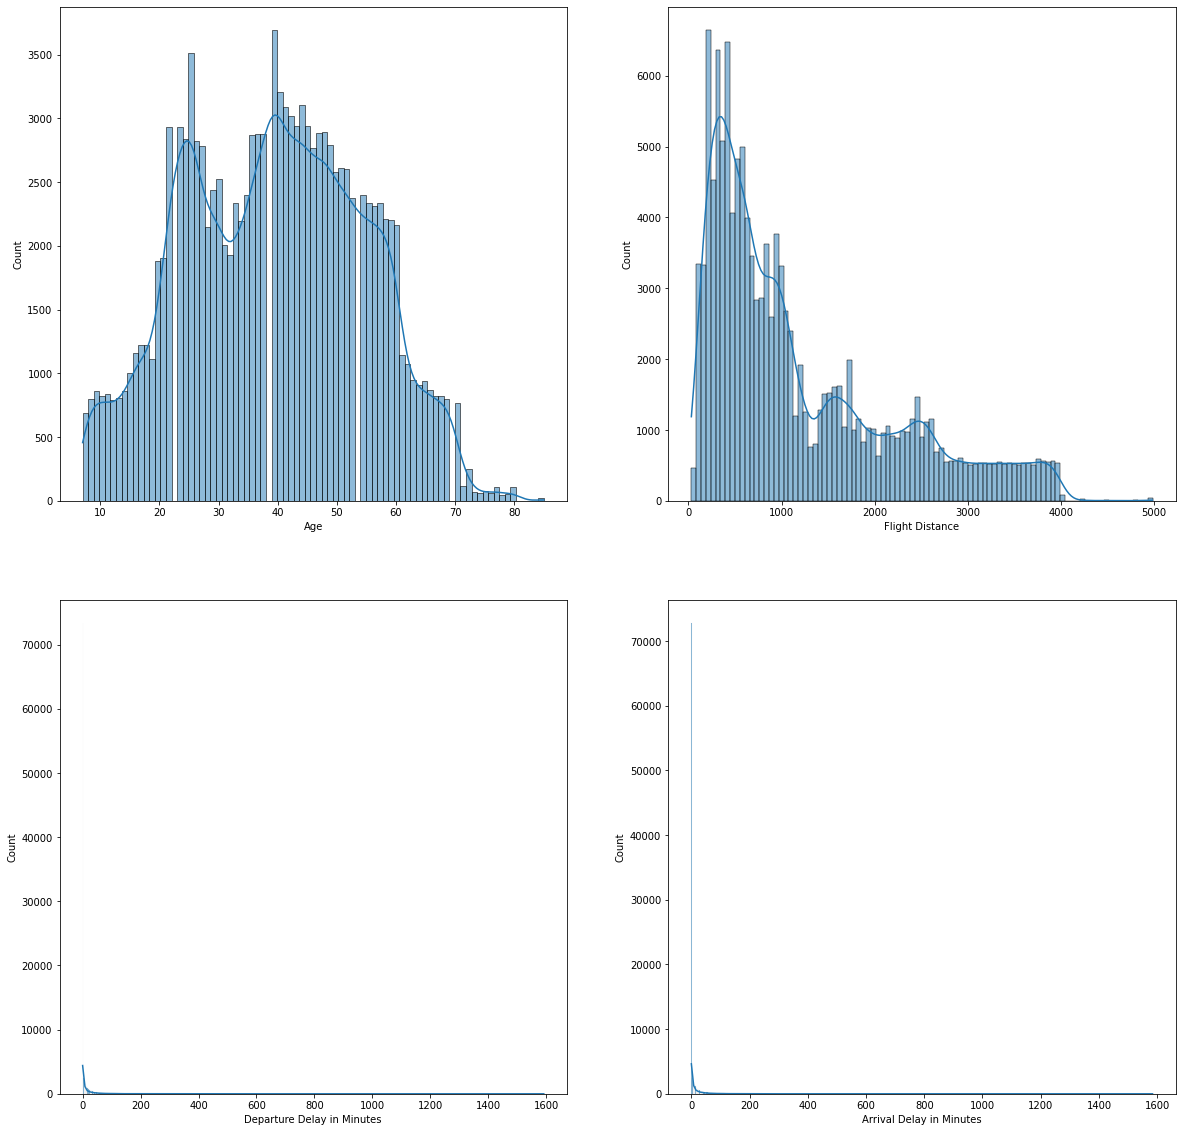

In [12]:
data_num = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
fig, axs = plt.subplots(round(len(data_num)/2), 2, figsize=(20,20))
for i in range(len(data_num)):
    sns.histplot(data=data, x=data_num[i], kde=True,ax=axs[i//2, i%2])

insight :
* `Age` have normal distribution
* `Flight Distance`, `Departure Delay in Minutes` and `Arrival Delay in Minutes` have skew distribution

##### 4.3 Outlier Detection for numerical columns

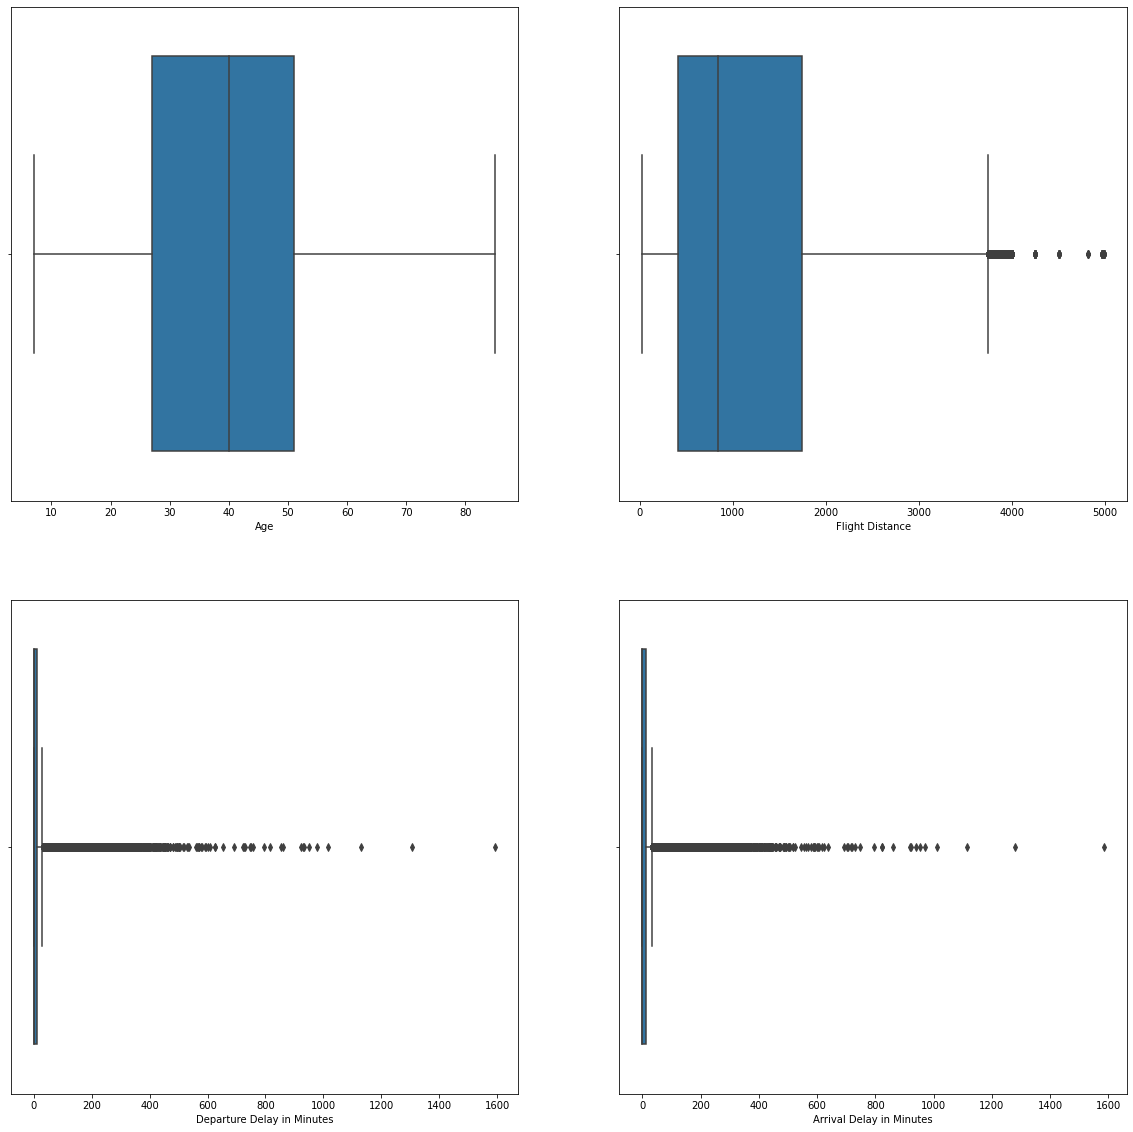

In [13]:
fig, axs = plt.subplots(round(len(data_num)/2), 2, figsize=(20,20))
for i in range(len(data_num)):
    sns.boxplot(data=data, x=data_num[i],ax=axs[i//2, i%2])

insight :
* it's seem there's an outlier in `Flight Distance`, `Departure Delay in Minutes` and `Arrival Delay in Minutes`. to make sure we need to check and handling the outliers in Data preprocessing.

### 5. Data Preprocessing

##### 5.1 Data Cleaning

before we doing data preprocessing we need to clean the data first

In [14]:
data.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


##### 5.1.1 Drop Unnecessary Columns

column `id` is not necessary for the analysis, we need to drop it

In [15]:
# drop columns `id`
data.drop(['id'], axis=1, inplace=True)

##### 5.1.2 Change Target Variable to Binary

In [16]:
# change target variable 'satisfaction' to binary
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

##### 5.1.3 Check missing values for target variable

In [17]:
# check missing values target variable
data['satisfaction'].isnull().sum()

0

there's no missing values in target variable

##### 5.1.4 Check duplicated input

In [18]:
# check duplicates
data.duplicated().sum()

0

##### 5.1.5 Change dtypes for categorical variables

In [19]:
data.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [20]:
# create features list
features_cat = ['Gender','Customer Type','Type of Travel','Class','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']

# change dtype of features list to category
for i in features_cat:
    data[i] = data[i].astype('category')
    

##### 5.2 Cardinality

we need to find out if the data have high cardinality

In [21]:
# create loop for count unique values for 'object' and 'category' data types
for i in features_cat:
    print(i, ':', data[i].nunique())

Gender : 2
Customer Type : 2
Type of Travel : 2
Class : 3
Inflight wifi service : 6
Departure/Arrival time convenient : 6
Ease of Online booking : 6
Gate location : 6
Food and drink : 6
Online boarding : 6
Seat comfort : 6
Inflight entertainment : 6
On-board service : 6
Leg room service : 6
Baggage handling : 5
Checkin service : 6
Inflight service : 6
Cleanliness : 6


it seems there's no high cardinality for each categorical feature

##### 5.3 Model inference

In [22]:
# get inference set
random = 5
data_inf = data.sample(1000,random_state=random)
data_inf.reset_index(drop=True, inplace=True)
data_inf.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,33,Personal Travel,Eco,937,2,2,2,4,4,2,4,4,4,5,4,4,4,4,0,0.0,0
1,Female,Loyal Customer,48,Business travel,Business,937,1,1,1,1,3,5,5,2,2,2,2,3,2,3,0,0.0,1
2,Female,disloyal Customer,27,Business travel,Business,2125,3,3,3,2,3,3,3,3,3,5,5,3,4,3,0,0.0,0
3,Male,Loyal Customer,27,Business travel,Business,2157,2,2,3,2,5,5,5,5,5,4,5,4,4,5,0,0.0,1
4,Male,Loyal Customer,25,Business travel,Eco Plus,590,4,3,4,4,4,4,4,4,4,5,4,3,3,4,0,0.0,0


In [23]:
#remove inference set from data
data_train_test = data.drop(data_inf.index)

#reset index
data_train_test.reset_index(drop=True)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,27,Business travel,Business,1089,2,2,2,1,1,2,1,1,4,5,4,5,4,1,0,7.0,0
1,Female,Loyal Customer,55,Personal Travel,Eco,419,2,4,3,3,3,1,4,1,1,3,2,3,1,4,0,0.0,0
2,Male,Loyal Customer,28,Business travel,Business,1942,4,4,3,4,5,5,5,5,1,2,5,5,4,5,0,0.0,1
3,Female,disloyal Customer,56,Personal Travel,Eco,589,1,5,1,3,3,1,4,3,4,1,1,5,4,3,7,12.0,0
4,Female,Loyal Customer,51,Business travel,Business,2246,5,5,5,5,4,5,5,3,3,4,3,3,3,5,41,32.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
128876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
128877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
128878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


##### 5.4 Splitting Dataset

we split dataset to train_val_set and test_set

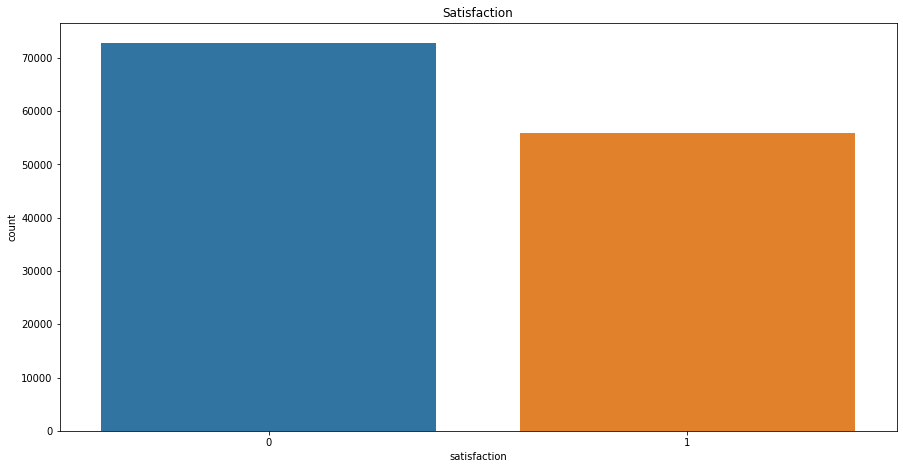

0    0.56558
1    0.43442
Name: satisfaction, dtype: float64


In [24]:
#countplot for y
plt.figure(figsize=(15,7.5))
sns.countplot(x=data_train_test.satisfaction)
plt.title('Satisfaction')
plt.show()

# percentage of y
print(data_train_test.satisfaction.value_counts(normalize=True))

the proportion of target variable is 56:44 so we can assume the data is balanced

In [25]:
# split data to X and y
X = data_train_test.drop(['satisfaction'], axis=1)
y = data_train_test['satisfaction']

In [26]:
# split X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random)

# X_train shape
print('X_train shape: ', X_train.shape)

# X_test shape
print('X_test shape: ', X_test.shape)

X_train shape:  (103104, 22)
X_test shape:  (25776, 22)


##### 5.5 Split data X_train for handling outlier & Handling missing values

split data with dtypes 'np.number' and 'object'

In [27]:
#select data with dtypes 'np.number' and 'object'
def split_dtypes(data):
    global X_train_num,X_train_cat
    X_train_num = data.select_dtypes(np.number)
    X_train_cat = data.select_dtypes('category')
    print("Generate 'X_train_num' and 'X_train_cat'")

split_dtypes(X_train)


Generate 'X_train_num' and 'X_train_cat'


split data numerical based on distribution : normal or skewed

In [28]:
#create function to split normal and skew data
def split_norm_skew_test(data):
    #create data frame with columns name : feature, skewness,distribution
    global distribution_df
    distribution_df = pd.DataFrame(columns=['feature','skewness','distribution'])
    for i in range(len(data.columns)):
        if data[data.columns[i]].skew() > -0.5 and data[data.columns[i]].skew() < 0.5 :
            distribution_df.loc[i] = [data.columns[i],data[data.columns[i]].skew(),'normal']
        else:
            distribution_df.loc[i] = [data.columns[i],data[data.columns[i]].skew(),'skew']
    
    print('Generate "distribution_df"')

####################################################
split_norm_skew_test(X_train_num)

distribution_df.sort_values(by='distribution',ascending=False)

Generate "distribution_df"


,feature,skewness,distribution
1,Flight Distance,1.110640,skew
2,Departure Delay in Minutes,6.507927,skew
3,Arrival Delay in Minutes,6.347112,skew
0,Age,-0.003441,normal


##### 5.5.1 Handling Outlier

##### 5.5.1.1 Detect outlier for each distribution

In [29]:
# create function to detect outliers based on distribution
def detect_outlier(data_name):
    #create dataframe with columns name : feature, distribution, outlier
    global outlier_df
    outlier_df = pd.DataFrame(columns=['feature','distribution','left_tail','right_tail','outlier','percentage'])
    #create loop for each feature
    for i in range(len(data_name.columns)):
        #create if statement for each distribution
        if data_name.iloc[:,i].skew() > -0.5 and data_name.iloc[:,i].skew() < 0.5 :
            #count outlier for normal distribution based on z-score
            outlier_df.loc[i] = [data_name.columns[i],
                                'normal',
                                data_name.iloc[:,i][(stats.zscore(data_name.iloc[:,i],nan_policy='omit'))<-3].count(),
                                data_name.iloc[:,i][(stats.zscore(data_name.iloc[:,i],nan_policy='omit'))>3].count(),
                                data_name.iloc[:,i][abs(stats.zscore(data_name.iloc[:,i],nan_policy='omit'))>3].count(),
                                data_name.iloc[:,i][abs(stats.zscore(data_name.iloc[:,i],nan_policy='omit'))>3].count()/len(data_name.iloc[:,i])*100]
        else:
            #count outlier for skew distribution based on IQR
            Q1 = data_name.iloc[:,i].quantile(0.25)
            Q3 = data_name.iloc[:,i].quantile(0.75)
            IQR = Q3 - Q1
            outlier_df.loc[i] = [data_name.columns[i],
                                'skew',
                                data_name.iloc[:,i][(data_name.iloc[:,i]<(Q1-1.5*IQR))].count(),
                                data_name.iloc[:,i][(data_name.iloc[:,i]>(Q3+1.5*IQR))].count(),
                                data_name.iloc[:,i][(data_name.iloc[:,i]<(Q1-1.5*IQR))|(data_name.iloc[:,i]>(Q3+1.5*IQR))].count(),
                                data_name.iloc[:,i][(data_name.iloc[:,i]<(Q1-1.5*IQR))|(data_name.iloc[:,i]>(Q3+1.5*IQR))].count()/len(data_name.iloc[:,i])*100]

    outlier_df = outlier_df[
        (outlier_df['percentage'] != 0)
    ].sort_values(by='percentage',ascending=False)

    print('Generate outlier_df')

detect_outlier(X_train_num)
outlier_df

Generate outlier_df


,feature,distribution,left_tail,right_tail,outlier,percentage
2,Departure Delay in Minutes,skew,0,14355,14355,13.922835
3,Arrival Delay in Minutes,skew,0,13859,13859,13.441768
1,Flight Distance,skew,0,2305,2305,2.235607
0,Age,normal,0,23,23,0.022308


##### 5.5.1.2 Handling outlier for each distribution with trimming/capping method

Handling Outlier :
1. Outlier < 5 % of the data, trimming
2. Outlier bettween 5 & 15% of the data, Capping or winsorizing
3. Outlier > 15% of the data, do nothing

In [30]:
#create function to handling outliers
def handling_outlier():
   global X_train,y_train
   norm_under_5 = outlier_df[outlier_df['distribution']=='normal'][outlier_df['percentage']<5]['feature'].tolist()
   norm_over_5 = outlier_df[outlier_df['distribution']=='normal'][outlier_df['percentage']>5]['feature'].tolist()
   skew_under_5 = outlier_df[outlier_df['distribution']=='skew'][outlier_df['percentage']<5]['feature'].tolist()
   skew_over_5 = outlier_df[outlier_df['distribution']=='skew'][outlier_df['percentage']>5]['feature'].tolist() 

   # modify if there's any exception list
   norm_under_5 = [x for x in norm_under_5 if x not in exception_list]
   skew_under_5 = [x for x in skew_under_5 if x not in exception_list]
   norm_over_5 = [x for x in norm_over_5 if x not in exception_list]
   skew_over_5 = [x for x in skew_over_5 if x not in exception_list]

   custom_list = ['norm_under_5','norm_over_5','skew_under_5','skew_over_5']

   for i in custom_list: 
      if i == 'norm_under_5' and len(norm_under_5)!= 0:
         
         trim_norm = OutlierTrimmer(capping_method='gaussian',
                                       tail='both', # left/right/both
                                       fold=3, # for gaussian 2 or 3
                                       variables=norm_under_5,
                                       missing_values='ignore')    
         trim_norm.fit(X_train)

         X_train = trim_norm.transform(X_train)
         
         #intersection of y_train and X_train index location
         y_train = y_train.loc[y_train.index.intersection(X_train.index)]

         
      elif i == 'norm_over_5' and len(norm_over_5)!= 0:

         winsorizer_norm = Winsorizer(capping_method='gaussian',
                                       tail='both', # left/right/both
                                       fold=3, # for gaussian 2 or 3
                                       variables=norm_over_5,
                                       missing_values='ignore')    
         winsorizer_norm.fit(X_train)

         X_train = winsorizer_norm.transform(X_train)
       
   
      elif i == 'skew_under_5'and len(skew_under_5)!= 0:

         trim_skew = OutlierTrimmer(capping_method='iqr',
                                       tail='both', # left/right/both
                                       fold=1.5, # for iqr 1 or 2
                                       variables=skew_under_5,
                                       missing_values='ignore')    
         trim_skew.fit(X_train)

         X_train= trim_skew.transform(X_train)

         #intersection of y_train and X_train

         y_train = y_train.loc[y_train.index.intersection(X_train.index)]
      

         
      elif i == 'skew_over_5' and len(skew_over_5)!= 0:

         winsorizer_skew = Winsorizer(capping_method='iqr',
                                    tail='both', # left/right/both
                                    fold=1.5, # for iqr 1 or 2
                                    variables=skew_over_5,
                                    missing_values='ignore')    
         winsorizer_skew.fit(X_train)

         X_train = winsorizer_skew.transform(X_train)
      
   print('Handling outliers Success! please use reload(data_name, example: reload(X_train)')

#function to plot outlier
def plot_outlier(data_name,feature_name):
   plt.figure(figsize=(16,4))

   #histogram
   plt.subplot(1,2,1)
   sns.histplot(data_name[feature_name])
   plt.title('Histogram')

   #boxplot
   plt.subplot(1,2,2)
   sns.boxplot(data_name[feature_name])
   plt.title('Boxplot')

   plt.show()

# function to reload after handling Outlier
def reload(data_name):
    #call function to split dtype
    split_dtypes(data_name)
    #call function to split norm and skew
    split_norm_skew_test(X_train_num)
    #call function to detect outliers
    detect_outlier(X_train_num)

exception_list = []

##### Analysis the outliers 

In [31]:
outlier_df

,feature,distribution,left_tail,right_tail,outlier,percentage
2,Departure Delay in Minutes,skew,0,14355,14355,13.922835
3,Arrival Delay in Minutes,skew,0,13859,13859,13.441768
1,Flight Distance,skew,0,2305,2305,2.235607
0,Age,normal,0,23,23,0.022308


Departure Delay in Minutes

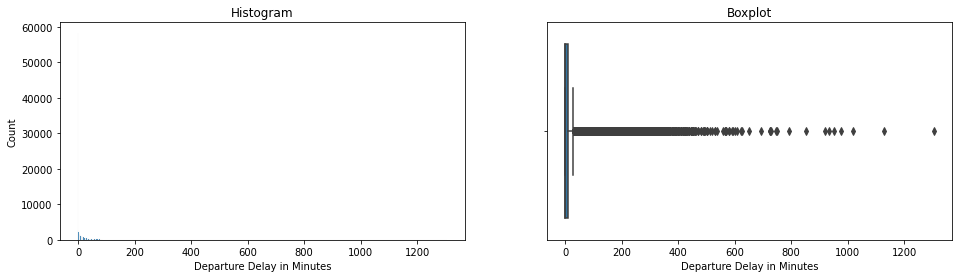

In [32]:
# plot outlier
plot_outlier(X_train,'Departure Delay in Minutes')

In [33]:
X_train['Departure Delay in Minutes'].describe()

count    103104.000000
mean         14.715627
std          38.003017
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1305.000000
Name: Departure Delay in Minutes, dtype: float64

analysis :
* we can see the majority of `departure delay in minutes` is 0 means there's no delay in the flight.
* the outlier is around 14% of the data so we will use capping method to handle it.

Arrival Delay in Minutes

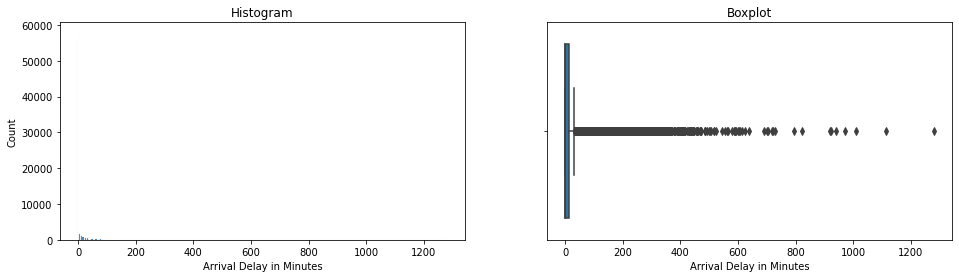

In [34]:
# plot outlier
plot_outlier(X_train,'Arrival Delay in Minutes')

In [35]:
X_train['Arrival Delay in Minutes'].describe()

count    102783.000000
mean         15.087544
std          38.382994
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1280.000000
Name: Arrival Delay in Minutes, dtype: float64

analysis :
* we can see the majority of `arrival delay in minutes` is 0 means there's no delay in the flight.
* the outlier is around 13% of the data so we will use capping method to handle it.

Flight Distance

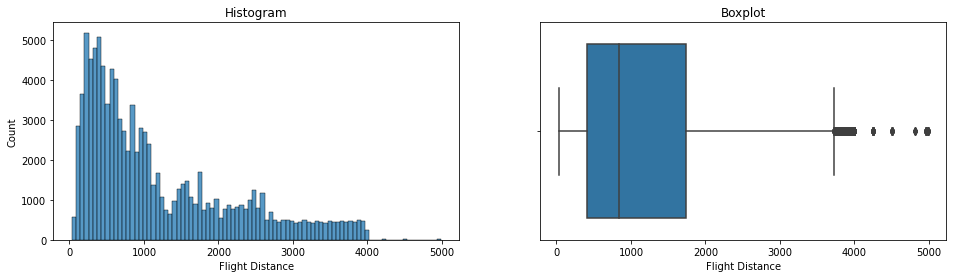

In [36]:
# plot outlier
plot_outlier(X_train,'Flight Distance')

In [37]:
X_train['Flight Distance'].describe()

count    103104.000000
mean       1187.802937
std         996.154964
min          31.000000
25%         414.000000
50%         842.000000
75%        1741.000000
max        4983.000000
Name: Flight Distance, dtype: float64

analysis : 
* the outlier is around 2% of the data so we will use trimming method to handle it.

Age

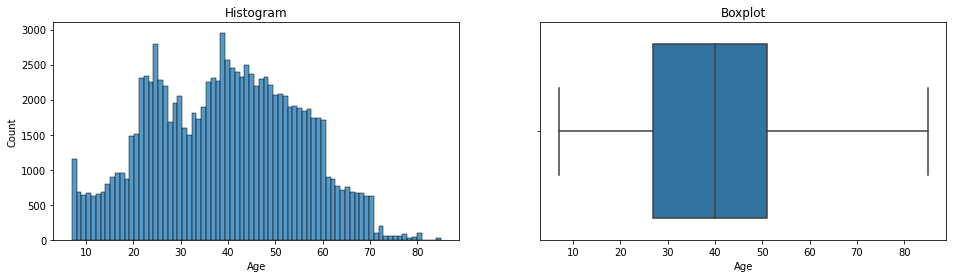

In [38]:
# plot outlier
plot_outlier(X_train,'Age')

In [39]:
X_train['Age'].describe()

count    103104.000000
mean         39.471951
std          15.114176
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

analysis :
* the outlier is around 0.02% of the data so we will use trimming method to handle it.

##### Handling Outliers

In [40]:
# create exception list
exception_list = []
handling_outlier()

Handling outliers Success! please use reload(data_name, example: reload(X_train)


In [41]:
reload(X_train)

Generate 'X_train_num' and 'X_train_cat'
Generate "distribution_df"
Generate outlier_df


##### 5.5.2 Handling missing values

Missing Values :

1. If missing values are too small : Complete Case Analysis
2. If missing values are less than 5% of the variable : Imputation
3. If missing values are more than 5% of the variable:
  - Mean/Median/Mode Imputation + adding 0/1 Imputation
  - Add Missing Label Imputation (categorical variable)

In [42]:
# create function to identify missing values by Normal distribution, Skew distribution, categorical
def missing_values(data_name):
    #create dataframe to store missing value, feature, type, missing value count, missing value percentage
    global missing_df
    found = False
    missing_df = pd.DataFrame(columns=['feature','type','missing_value_count','missing_value_percentage'])
    #create for loop to iterate through each column
    for i in range(len(data_name.columns)):
        #create if function to check dtype
        if data_name.dtypes[i] == 'category':
            #count missing value for categorical
            missing_df.loc[i] = [data_name.columns[i],
                                'Categorical',
                                data_name.isnull().sum()[i],
                                data_name.isnull().sum()[i]/len(data_name)*100]
            found = True
        else:
            #create if function to check data distribution normal or skew
            if data_name.iloc[:,i].skew()<-0.5 or data_name.iloc[:,i].skew()>0.5:
                #count missing value for skew
                missing_df.loc[i] = [data_name.columns[i],
                                    'numerical-skew',
                                    data_name.isnull().sum()[i],
                                    data_name.isnull().sum()[i]/len(data_name)*100]
                found = True            
            else:
                #count missing value for normal
                missing_df.loc[i] = [data_name.columns[i],
                                    'numerical-normal',
                                    data_name.isnull().sum()[i],
                                    data_name.isnull().sum()[i]/len(data_name)*100]
                found = True
    print('generate "missing_df"')

##### 5.5.2.1 identify missing values in X_train

In [43]:
# identify missing values
missing_values(X_train)
missing_df

generate "missing_df"


,feature,type,missing_value_count,missing_value_percentage
0,Gender,Categorical,0,0.000000
1,Customer Type,Categorical,0,0.000000
2,Age,numerical-normal,0,0.000000
3,Type of Travel,Categorical,0,0.000000
4,Class,Categorical,0,0.000000
5,Flight Distance,numerical-skew,0,0.000000
6,Inflight wifi service,Categorical,0,0.000000
7,Departure/Arrival time convenient,Categorical,0,0.000000
8,Ease of Online booking,Categorical,0,0.000000
9,Gate location,Categorical,0,0.000000


In [44]:
# create list based on missing_df
cat_list = missing_df[missing_df['type'] == 'Categorical']['feature'].tolist()
norm_list = missing_df[missing_df['type'] == 'numerical-normal']['feature'].tolist()
skew_list = missing_df[missing_df['type'] == 'numerical-skew']['feature'].tolist()

we will handling missing values using pipeline

In [45]:
# reload data before feature selection
reload(X_train)

Generate 'X_train_num' and 'X_train_cat'
Generate "distribution_df"
Generate outlier_df


##### 5.6 Feature selection

##### Numerical Feature

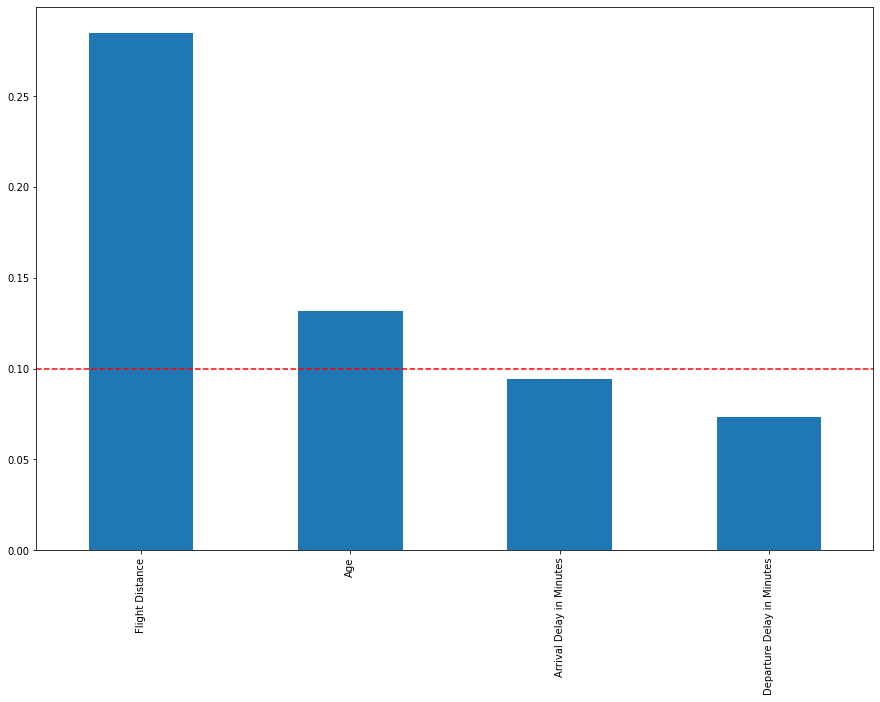

In [46]:
# create corwith X_train and y_train
corr_train = X_train_num.corrwith(y_train)
plt.figure(figsize=(15,10))
plt.axhline(y=0.1, color='r', linestyle='--')
corr_train.abs().sort_values(ascending=False).plot(kind='bar')
plt.show()

we set the threshold for this project if the features correlation is less than 0.1, we will drop the feature. based on graph above we can see `Departure Delay in Minutes` and `Arrival Delay in Minutes` have correlation less than 0.1, so we will drop them.

##### Categorical Features

for categorical ordinal features we can calculate the correlation between each feature and target variable with `spearman` method.

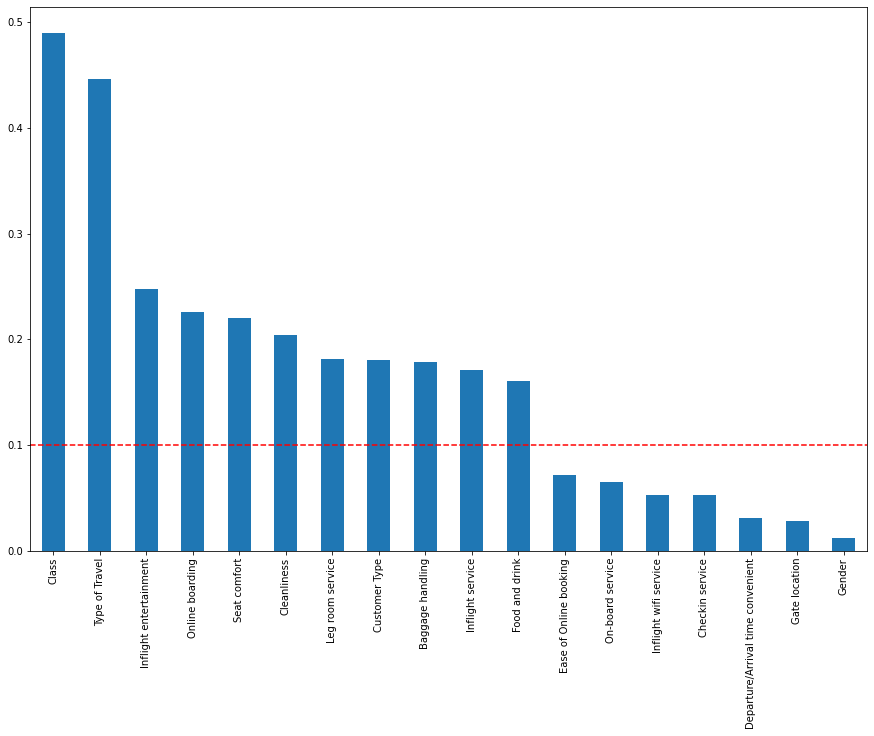

In [47]:
#convert all categorical columns to numeric
X_train_cat = X_train_cat.apply(lambda x: pd.factorize(x)[0])

# create corwith X_train and y_train
corr_train = X_train_cat.corrwith(y_train,method='spearman')
fig = plt.figure(figsize=(15,10))
plt.axhline(y=0.1, color='r', linestyle='--')
corr_train.abs().sort_values(ascending=False).plot(kind='bar')
plt.show()

as we can see on Exploratory Data Analysis, we can see there's no different between customer satisfaction based on `Gender`. so we will drop the `Gender` feature.

In [48]:
print('numerical-normal: ',norm_list)
print('')
print('numerical-skew: ',skew_list)
print('')
print('Categorical: ',cat_list)

numerical-normal:  ['Age']

numerical-skew:  ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

Categorical:  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [49]:
# feature selection 
list_drop = ['Departure Delay in Minutes','Arrival Delay in Minutes','Gender']
X_train_final = X_train.drop(columns=list_drop)
X_test_final = X_test.drop(columns=list_drop)

##### 5.7 Feature Engineering

In [50]:
# column selection
cat_ord_colums = [
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

cat_nom_columns = ['Customer Type','Type of Travel','Class']

num_norm_columns = ['Age']

num_skew_columns = ['Flight Distance']

##### Categorical ordinal encoding

based on EDA we can categories the ordinal features

In [51]:
ordinal_categories = OrdinalEncoder(categories=[
[0, 1, 2, 3, 4, 5],
[0, 1, 2, 3, 4, 5],
[0, 1, 2, 3, 4, 5],
[0, 1, 2, 3, 4, 5],
[0, 1, 2, 3, 4, 5],    
[0, 1, 2, 3, 4, 5],
[0, 1, 2, 3, 4, 5],
[0, 1, 2, 3, 4, 5],
[0, 1, 2, 3, 4, 5],
[0, 1, 2, 3, 4, 5],
[1, 2, 3, 4, 5],
[0, 1, 2, 3, 4, 5],
[0, 1, 2, 3, 4, 5],
[0, 1, 2, 3, 4, 5],
])

In [52]:
pipe_cat_ord = Pipeline([
    ('cat_ord_imputer',SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('cat_ord',ordinal_categories)
])

pipe_cat_num = Pipeline([
    ('cat_num_imputer',SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('cat_num',OneHotEncoder(handle_unknown='ignore'))
])

pipe_norm_num = Pipeline([
    ('norm_num_imputer',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('norm_num',StandardScaler())
])

pipe_skew_num = Pipeline([
    ('skew_num_imputer',SimpleImputer(missing_values=np.nan, strategy='median')),
    ('skew_num',StandardScaler())
])

pipe_fe = ColumnTransformer([
    ('pipe_cat_ord', pipe_cat_ord, cat_ord_colums),
    ('pipe_cat_num', pipe_cat_num, cat_nom_columns),
    ('pipe_norm_num', pipe_norm_num, num_norm_columns),
    ('pipe_skew_num', pipe_skew_num, num_skew_columns)
   
])


 ### 6. Model Definition

Because the model is classifcation, the model we use is :
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K-Nearest Neighbors
5. AdaBoost

the metrics we use is :
1. Accuracy/ Micro Average
2. Classfication report

the reason we use Accuracy/Micro average is because the data is balanced.


##### 6.1. Model 1 : Logistic Regression

In [53]:
# baseline model
log_reg = LogisticRegression(random_state=random)

# pipeline model
pipe_log_reg = Pipeline([
    ('fe_transformer', pipe_fe),
    ('log_reg',log_reg)
])

# hyperparameter tuning
param_log_reg = {
    'log_reg__C':[0.01,0.1,1,10],
    'log_reg__solver':['liblinear','newton-cg','sag','saga','lbfgs']

}

##### 6.3 Model 3 : Decision Tree Classifier

In [54]:
# baseline model
dt = DecisionTreeClassifier(random_state=random)

# pipeline model
pipe_dt = Pipeline([
    ('transformer',pipe_fe),
    ('dt',dt),
])

# hyperparameter tuning
param_dt = {
    'dt__min_samples_split':[2,3,4],
    'dt__min_samples_leaf':[1,2,3,4],
    'dt__criterion':['gini','entropy']
}


##### 6.4 Model 4 : Random Forest Classifier

In [55]:
# baseline model
rf = RandomForestClassifier(random_state=random,n_jobs=-1)

# pipeline model
pipe_rf = Pipeline([
    ('transformer',pipe_fe),
    ('rf',rf),
])

# hyperparameter tuning
param_rf = {
    'rf__criterion':['gini','entropy'],
    'rf__n_estimators':[100,150,200],
    'rf__warm_start':[True],
}

##### 6.5 Model 5 : K-Nearest Neighbors

In [56]:
# baseline model
knn = KNeighborsClassifier()

# pipeline model
pipe_knn = Pipeline([
    ('transformer',pipe_fe),
    ('knn',knn),
])

# hyperparameter tuning
param_knn = {
    'knn__n_neighbors':[1,2,3,4,5],
    'knn__weights':['uniform','distance'],
    'knn__algorithm':['auto','ball_tree','kd_tree','brute']
}


##### 6.7 Model 7 : AdaBoost Classifier

In [57]:
# baseline model
ada = AdaBoostClassifier(random_state=random)

# pipeline model
pipe_ada = Pipeline([
    ('transformer',pipe_fe),
    ('ada',ada),
])

# hyperparameter tuning
param_ada = {
    'ada__n_estimators':[10,20,30],
    'ada__learning_rate':[0.1,0.2,0.3,0.4,0.5],
    'ada__algorithm':['SAMME','SAMME.R']
}

### 7. Model Training

Train baseline models and using cross validation to select the best model

In [58]:
# cross validation model

model_list = [pipe_log_reg,pipe_dt,pipe_rf,pipe_knn,pipe_ada]

model_name_list = ['log_reg','dt','rf','knn','ada']
mean = []
std   = []

# for loop to get the accuracy of each model
for i in model_list:
    i.fit(X_train_final,y_train)
    cv = cross_val_score(i,X_train_final,y_train,cv=5,scoring='accuracy')
    mean.append(cv.mean())
    std.append(cv.std())

# create dataframe
cv_result = pd.DataFrame({'model':model_name_list,'mean':mean,'std':std})


   
   ### 8. Model Evaluation

In [59]:
cv_result

,model,mean,std
0,log_reg,0.873860,0.002098
1,dt,0.943172,0.001846
2,rf,0.962085,0.001366
3,knn,0.930976,0.001070
4,ada,0.927186,0.001074


we can see the best model is `Random Forest Classifier`, but to make sure which model is the best we need to evaluate each model with the test set. to find out if the model is goodfit or not.

##### 8.1. Model 1 : Logistic Regression

In [60]:
# cross validation  score
log_reg_train_score = cross_val_score(pipe_log_reg,X_train_final,y_train,cv=5,scoring='accuracy').mean()
log_reg_train_score

0.8738601493318624

In [61]:
# prediction test data
y_pred_log_reg = pipe_log_reg.predict(X_test_final)

In [62]:
# test score
log_reg_test_score = accuracy_score(y_test,y_pred_log_reg)
log_reg_test_score

0.8724782743637493

In [63]:
# classification report
print(classification_report(y_test,y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14556
           1       0.87      0.83      0.85     11220

    accuracy                           0.87     25776
   macro avg       0.87      0.87      0.87     25776
weighted avg       0.87      0.87      0.87     25776



`Analysis` :\
based on metrics `Accuracy Score` as we can see that the score for `Logistic Regression` with Cross Validation is `0.8738` and the score for test set is `0.8724`, so we can say that the model is good fitting. the hyperparameter we use for this baseline model is default hyperparameter. in this model the compute time is around 10 seconds.

##### 8.2. Model 2 : Decision Tree Classifier

In [64]:
# cross validation  score
dt_train_score = cross_val_score(pipe_dt,X_train_final,y_train,cv=5,scoring='accuracy').mean()
dt_train_score

0.9431715747903147

In [65]:
# prediction test data
y_pred_dt= pipe_dt.predict(X_test_final)

In [66]:
# test score
dt_test_score = accuracy_score(y_test,y_pred_dt)
dt_test_score

0.9471989447548107

In [67]:
# classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14556
           1       0.94      0.94      0.94     11220

    accuracy                           0.95     25776
   macro avg       0.95      0.95      0.95     25776
weighted avg       0.95      0.95      0.95     25776



`Analysis` :\
based on metrics `Accuracy Score` as we can see that the score for `Decission Tree Classifier` with Cross Validation is `0.9431` and the score for test set is `0.9471`, so we can say that the model is good fitting. the hyperparameter we use for this baseline model is default hyperparameter. in this model the compute time is around 5 seconds.

##### 8.3 Model 3 : Random Forest Classifier

In [68]:
# cross validation  score
rf_train_score = cross_val_score(pipe_rf,X_train_final,y_train,cv=5,scoring='accuracy').mean()
rf_train_score

0.9620846314647512

In [69]:
# prediction test data
y_pred_rf= pipe_rf.predict(X_test_final)

In [70]:
# test score
rf_test_score = accuracy_score(y_test,y_pred_rf)
rf_test_score

0.9642690875232774

In [71]:
# classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14556
           1       0.98      0.94      0.96     11220

    accuracy                           0.96     25776
   macro avg       0.97      0.96      0.96     25776
weighted avg       0.96      0.96      0.96     25776



`Analysis` :\
based on metrics `Accuracy Score` as we can see that the score for `Random Forest Classifier` with Cross Validation is `0.9620` and the score for test set is `0.9642`, so we can say that the model is good fitting. the hyperparameter we use for this baseline model is default hyperparameter. in this model the compute time is around 25 seconds.

##### 8.4 Model 4 : K-Nearest Neighbors

In [72]:
# cross validation  score
knn_train_score = cross_val_score(pipe_knn,X_train_final,y_train,cv=5,scoring='accuracy').mean()
knn_train_score

0.9309763270947045

In [73]:
# prediction test data
y_pred_knn= pipe_knn.predict(X_test_final)

In [74]:
# test score
knn_test_score = accuracy_score(y_test,y_pred_knn)
knn_test_score

0.9342411545623837

In [75]:
# classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14556
           1       0.95      0.89      0.92     11220

    accuracy                           0.93     25776
   macro avg       0.94      0.93      0.93     25776
weighted avg       0.94      0.93      0.93     25776



`Analysis` :\
based on metrics `Accuracy Score` as we can see that the score for `K-Nearest Neighbor` with Cross Validation is `0.9309` and the score for test set is `0.9335`, so we can say that the model is good fitting. the hyperparameter we use for this baseline model is default hyperparameter. in this model the compute time is around 3 minutes.

##### 8.5 Model 5 : Ada Boost

In [76]:
# cross validation  score
ada_train_score = cross_val_score(pipe_ada,X_train_final,y_train,cv=5,scoring='accuracy').mean()
ada_train_score

0.9271857881139368

In [77]:
# prediction on test data
y_pred_ada = pipe_ada.predict(X_test_final)

In [78]:
# test score
ada_test_score = accuracy_score(y_test,y_pred_ada)
ada_test_score

0.9253957169459963

In [79]:
# classification report
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14556
           1       0.92      0.91      0.91     11220

    accuracy                           0.93     25776
   macro avg       0.92      0.92      0.92     25776
weighted avg       0.93      0.93      0.93     25776



`Analysis` :\
based on metrics `Accuracy Score` as we can see that the score for `Ada Boost` with Cross Validation is `0.9271` and the score for test set is `0.9253`, so we can say that the model is good fitting. the hyperparameter we use for this baseline model is default hyperparameter. in this model the compute time is around 3 minutes.

##### Summary model baseline evaluation

In [80]:
# create dataframe summary with cross validation score and test score
baseline_result = pd.DataFrame({'model':['log_reg','dt','rf','knn','ada'],'train_score':[log_reg_train_score,dt_train_score,rf_train_score,knn_train_score,ada_train_score],'test_score':[log_reg_test_score,dt_test_score,rf_test_score,knn_test_score,ada_test_score]})

baseline_result

,model,train_score,test_score
0,log_reg,0.873860,0.872478
1,dt,0.943172,0.947199
2,rf,0.962085,0.964269
3,knn,0.930976,0.934241
4,ada,0.927186,0.925396


as we can see the best model with high score and  goodfit is `Random Forest Classifier` and `Decision Tree Classifier`. so we will choose these two model.

##### 8.4 Model Tuning using GridSearchCV

##### Model 3 : Random Forest Classifier

In [81]:
# random forest model

rf_grid = GridSearchCV(
    pipe_rf,
    param_rf,
    cv=5,
    scoring='accuracy',
    verbose=1
).fit(X_train_final,y_train)

best_params_rf = rf_grid.best_params_
best_pipe_rf = rf_grid.best_estimator_
df_result_rf = pd.DataFrame.from_dict(rf_grid.cv_results_,orient='columns')


Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [82]:
#Best parameters
best_params_rf

{'rf__criterion': 'entropy', 'rf__n_estimators': 150, 'rf__warm_start': True}

In [83]:
# best score
rf_grid.best_score_

0.9628288469264963

In [84]:
# predict test with best parameters
y_pred_linear_svc_grid = best_pipe_rf.predict(X_test_final)

In [85]:
# f1_weighted score
print(accuracy_score(y_test,y_pred_linear_svc_grid))

0.9649674115456238


In [86]:
# classification report
print(classification_report(y_test,y_pred_linear_svc_grid))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14556
           1       0.98      0.94      0.96     11220

    accuracy                           0.96     25776
   macro avg       0.97      0.96      0.96     25776
weighted avg       0.97      0.96      0.96     25776



`Analysis`:\
from 30 fits (Combinations of hyperparameters), we can see that the best hyperparameter is `'rf__criterion': 'entropy', 'rf__n_estimators': 150, 'rf__warm_start': True`. the Trainscore is `0.9628 `and the test  score is `0.9649`, the model is good fitting. the compute time is around 3 minutes. there's is a little improvement in this model compare to the baseline model.

##### Model 2 : Decision Tree Classifier

In [87]:
# decision tree model

dt_grid = GridSearchCV(
    pipe_dt,
    param_dt,
    cv=5,
    scoring='accuracy',
    verbose=1
).fit(X_train_final,y_train)

best_params_dt = dt_grid.best_params_
best_pipe_dt = dt_grid.best_estimator_
df_result_dt = pd.DataFrame.from_dict(dt_grid.cv_results_,orient='columns')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [88]:
# best parameters
best_params_dt

{'dt__criterion': 'entropy',
 'dt__min_samples_leaf': 4,
 'dt__min_samples_split': 2}

In [89]:
# best score
dt_grid.best_score_

0.9479841828134006

In [90]:
# predict test with best parameters
y_pred_dt_grid = best_pipe_dt.predict(X_test_final)

In [91]:
# f1 weighted score
print(accuracy_score(y_test,y_pred_dt_grid))

0.950923339540658


In [92]:
# classification report
print(classification_report(y_test,y_pred_dt_grid))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14556
           1       0.95      0.93      0.94     11220

    accuracy                           0.95     25776
   macro avg       0.95      0.95      0.95     25776
weighted avg       0.95      0.95      0.95     25776



`Analysis`:\
from 120 fits (Combinations of hyperparameters), we can see that the best hyperparameter is `'dt__criterion': 'entropy','dt__min_samples_leaf': 4,'dt__min_samples_split': 2.` the Train score is `0.9479 `and the test  score is `0.9509`, the model is good fitting. the compute time is around 90 second. there's is a little improvement in this model compare to the baseline model.

##### Hyperparameter Tuning Summary

In [93]:
# create dataframe summary log reg, linear svc, ada boost

grid_summary = pd.DataFrame({'model' : ['Random Forest','Decision Tree'],
                            'best_params':[best_params_rf,best_params_dt,],
                            'Train_score':[rf_grid.best_score_,dt_grid.best_score_],
                            'Test_score':[rf_test_score,dt_test_score]})

grid_summary



,model,best_params,Train_score,Test_score
0,Random Forest,"{'rf__criterion': 'entropy', 'rf__n_estimators...",0.962829,0.964269
1,Decision Tree,"{'dt__criterion': 'entropy', 'dt__min_samples_...",0.947984,0.947199


based on the summary above we choose `Random Forest` as our final model.

### 9. Model Saving

we will save the model for deployment.

In [94]:
final_model = rf_grid.best_estimator_

In [95]:
with open('model.pkl', 'wb') as f: 
    pickle.dump(final_model, f, protocol=pickle.HIGHEST_PROTOCOL)

   ### 10. Model Inference


In [96]:
data_inf.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,33,Personal Travel,Eco,937,2,2,2,4,4,2,4,4,4,5,4,4,4,4,0,0.0,0
1,Female,Loyal Customer,48,Business travel,Business,937,1,1,1,1,3,5,5,2,2,2,2,3,2,3,0,0.0,1
2,Female,disloyal Customer,27,Business travel,Business,2125,3,3,3,2,3,3,3,3,3,5,5,3,4,3,0,0.0,0
3,Male,Loyal Customer,27,Business travel,Business,2157,2,2,3,2,5,5,5,5,5,4,5,4,4,5,0,0.0,1
4,Male,Loyal Customer,25,Business travel,Eco Plus,590,4,3,4,4,4,4,4,4,4,5,4,3,3,4,0,0.0,0
5,Male,Loyal Customer,66,Personal Travel,Eco,1096,1,2,1,3,4,1,4,4,2,3,4,4,3,4,7,31.0,0
6,Female,Loyal Customer,20,Personal Travel,Eco,2288,2,2,2,3,2,2,2,2,4,1,3,4,4,2,0,11.0,0
7,Female,Loyal Customer,7,Personal Travel,Eco,1754,1,1,1,3,1,1,1,1,3,4,3,1,3,1,2,0.0,0
8,Male,disloyal Customer,26,Business travel,Business,240,0,0,0,3,4,0,1,4,3,4,4,5,5,4,8,0.0,1
9,Male,Loyal Customer,58,Business travel,Business,2453,2,3,3,3,4,2,3,2,2,2,2,2,2,2,122,130.0,0


##### 9.1 Check missing values in model inference

In [97]:
missing_values(data_inf)

generate "missing_df"


##### 9.2 Split target variable

In [98]:
X_inf = data_inf.drop(['satisfaction'],axis=1)
y_inf = data_inf['satisfaction']

##### 9.3 Feature selection

In [99]:
# feature selection
X_inf_select = X_inf.drop(columns=list_drop)

##### 9.4 Model Predict

in this part we want to predict the model perfromance using inference data, since we got 3 best model, we will use these 3 models.

##### Model 1 : Logistic Regression

In [100]:
# logistic regression
y_inf_rf= final_model.predict(X_inf_select)
y_inf_log_rf = pd.DataFrame(y_inf_rf,columns=['y_inf_rf'])

##### 9.5 Prediction Result

in this part we gonna evaluate the prediction report on the inference data, we will use the best model from the previous part

In [101]:
# concat dataframe
inf_result = []
inf_result = pd.concat([y_inf,y_inf_log_rf],axis=1)
inf_result.head(10)

,satisfaction,y_inf_rf
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


##### Logistic Regression Result

In [102]:
# f1_weighted score log_reg
accuracy_score(y_inf,y_inf_log_rf)

0.995

In [103]:
# classification report log_reg
print(classification_report(y_inf,y_inf_log_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       551
           1       1.00      0.99      0.99       449

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000



`Analysis` :

we use the data inference to predict the target variables, the accuracy score is 0.995, thats mean the model could predict the target variable with 99.5% accuracy.

   ### 10. Conclusion

### EDA Analysis

**Data visualization and Grouping**

* the target variable proportion is 56% for `neutral or dissatisfaction` and 44% for `satisfaction`
* the majority of customer is `neutral or dissatisfied`
* based on gender we can see there's no different between male and female in term of satisfaction
* the majority of customer is `loyal customer`
* for `disloyal` customer the satisfaction level is `neutral or dissatisfied`
* most of type of travel customer is `business travel`
* we can see the different  between `personal travel` and `business travel` in term of satisfaction, most of the customer type with `personal travel` is `neutral or dissatisfied`.


**Data Distribution Analysis**
* `Age` have normal distribution
* `Flight Distance`, `Departure Delay in Minutes` and `Arrival Delay in Minutes` have skew distribution

**Outlier Detection**

* there's an outlier in `Flight Distance`, `Departure Delay in Minutes` and `Arrival Delay in Minutes`. to make sure we need to check and handling the outliers in Data preprocessing. but in the Data preprocessing we also detect the outliers for `Age` features.

### Model Analysis

**in this project we use 5 classification model, the model we use are :**

a. Logistic Regression\
b. Decision Tree\
c. Random Forest\
d. K-Nearest Neighbors\
e. Naive Bayes\


**based on the 7 model we used cross validation to select the best model, table below is the score for each model :**

In [104]:
cv_result

,model,mean,std
0,log_reg,0.873860,0.002098
1,dt,0.943172,0.001846
2,rf,0.962085,0.001366
3,knn,0.930976,0.001070
4,ada,0.927186,0.001074


the result is from baseline model (default parameter), we conclude that we choose 2 best model with best performance, the indicator is highest mean and lowest standard deviation, in the result above we got 2 models with best performance :

1. Random Forest Classifier
2. Decision Tree Classifier


**Hyperparameter Tuning to improve model performance**

after we select 2 best model, we can improve the performance by using hyperparameter tuning, tabel below the result for each model :

In [105]:
grid_summary

,model,best_params,Train_score,Test_score
0,Random Forest,"{'rf__criterion': 'entropy', 'rf__n_estimators...",0.962829,0.964269
1,Decision Tree,"{'dt__criterion': 'entropy', 'dt__min_samples_...",0.947984,0.947199


**Model Inference**

In [106]:
# classification report log_reg
print(classification_report(y_inf,y_inf_log_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       551
           1       1.00      0.99      0.99       449

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000



the accuracy score is 0.995, thats mean the model could predict the target variable with 99.5% accuracy.